In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,LabelBinarizer, MinMaxScaler, StandardScaler,PolynomialFeatures,RobustScaler

In [2]:
y=np.array(['chat','chien','chat','oiseau'])

In [4]:
# créer un encoder
# LabelEncoder est utilisé uniquement pour les sorties y en listes mais pas les X
encoder=LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [5]:
# fonction inverse
encoder.inverse_transform(np.array([0, 1, 0, 2]))

array(['chat', 'chien', 'chat', 'oiseau'], dtype='<U6')

In [6]:
X=np.array([['chat','Poils'],
           ['chien','Poils'],
           ['chat','Poils'],
           ['Oiseau','Plumes']])

In [7]:
# OrdinalEncoder
encoder_2=OrdinalEncoder()
encoder_2.fit_transform(X)

array([[1., 1.],
       [2., 1.],
       [1., 1.],
       [0., 0.]])

In [8]:
 # Ordinal encorder n'est pas pratique

In [9]:
encoder_3=LabelBinarizer(sparse_output=True)
encoder_3.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [10]:
X=np.array([[70],[80],[120]])

In [11]:
scaler=MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [12]:
from sklearn.datasets import load_iris

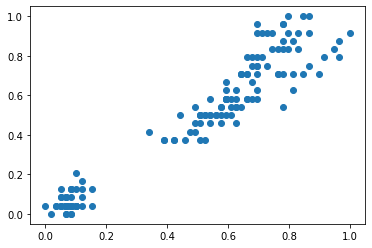

In [13]:
iris=load_iris()
X=iris.data
X_minmax=MinMaxScaler().fit_transform(X)

plt.scatter(X_minmax[:,2],X_minmax[:,3])
plt.show()

In [14]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDClassifier
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y)

# Transformer
scaler=StandardScaler()
X_train_transformed=scaler.fit_transform(X_train)
# Estimator
model=SGDClassifier(random_state=0)
model.fit(X_train_transformed,y_train)

# test
X_test_transformed=scaler.transform(X_test)
print(model.score(X_test_transformed,y_test))
model.predict(X_test_transformed)

0.9473684210526315


array([1, 2, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2])

# Pipeline

In [15]:
# estimateur composite
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(),SGDClassifier())
model.fit(X_train,y_train)
model.predict(X_test)

array([1, 2, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2])

In [16]:
model.score(X_test,y_test)

0.9210526315789473

In [17]:
# On peut utiliser les pipelines pour la crossvalidation
from sklearn.model_selection import GridSearchCV


In [18]:
model=make_pipeline(PolynomialFeatures(),RobustScaler(),SGDClassifier(random_state=0))
params={'polynomialfeatures__degree':[2,3,4],'sgdclassifier__penalty':['l1','l2']}
grid=GridSearchCV(model,param_grid=params, cv=4)

grid.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('robustscaler', RobustScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [19]:
grid.best_params_

{'polynomialfeatures__degree': 3, 'sgdclassifier__penalty': 'l2'}

In [20]:
grid.best_score_

0.9642857142857143

# Column transformer

In [22]:
import seaborn as sns
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
X=titanic.drop('survived',axis=1)
y=titanic['survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [61]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector

In [62]:
# On peut aller plus loin avec make_column_selector


# numerical_features=['pclass','age','fare']
# categorical_features=['sex','deck','alone']

numerical_features=make_column_selector(dtype_include=np.number)
categorical_features=make_column_selector(dtype_exclude=np.number)

In [63]:
numerical_pipeline= make_pipeline(SimpleImputer(),StandardScaler())
categorical_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'),
                                  OneHotEncoder())

In [64]:
preprocessor=make_column_transformer((numerical_pipeline,numerical_features),
                        (categorical_pipeline,categorical_features))

In [65]:
model=make_pipeline(preprocessor, SGDClassifier())
model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B77C6A7688>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEn

In [67]:
model.score(X_test,y_test)

1.0

In [81]:
#titanic.drop(['alone','alive','who','adult_male','embark_town','class'],axis=1,inplace=True)
#titanic.dropna(axis=0,inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
1,1,1,female,38.0,1,0,71.2833,C,C
3,1,1,female,35.0,1,0,53.1000,S,C
6,0,1,male,54.0,0,0,51.8625,S,E
10,1,3,female,4.0,1,1,16.7000,S,G
11,1,1,female,58.0,0,0,26.5500,S,C


In [84]:
#sns.pairplot(titanic,hue="survived")

In [85]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
1,1,1,female,38.0,1,0,71.2833,C,C
3,1,1,female,35.0,1,0,53.1000,S,C
6,0,1,male,54.0,0,0,51.8625,S,E
10,1,3,female,4.0,1,1,16.7000,S,G
11,1,1,female,58.0,0,0,26.5500,S,C
